In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('titanic')


In [3]:
class_counts = df['class'].value_counts()
relative_freq = df['class'].value_counts(normalize=True) * 100
cumulative_freq = class_counts.cumsum()

frequency_table = pd.DataFrame({
    'Absolute Frequency': class_counts,
    'Relative Frequency (%)': relative_freq.round(2),
    'Cumulative Frequency': cumulative_freq
})

print(frequency_table)


        Absolute Frequency  Relative Frequency (%)  Cumulative Frequency
class                                                                   
Third                  491                   55.11                   491
First                  216                   24.24                   707
Second                 184                   20.65                   891


In [4]:
contingency_table = pd.crosstab(df['sex'], df['survived'], margins=True)
print(contingency_table)


survived    0    1  All
sex                    
female     81  233  314
male      468  109  577
All       549  342  891


In [ ]:
total = len(df)
joint_prob = len(df[(df['sex'] == 'female') & (df['survived'] == 1)]) / total
marginal_female = len(df[df['sex'] == 'female']) / total
marginal_survived = len(df[df['survived'] == 1]) / total
cond_survived_given_female = joint_prob / marginal_female
cond_female_given_survived = joint_prob / marginal_survived

print(f"Joint Probability P(female, survived=1): {joint_prob:.4f}")
print(f"Marginal Probability P(female): {marginal_female:.4f}")
print(f"Marginal Probability P(survived=1): {marginal_survived:.4f}")
print(f"Conditional Probability P(survived=1 | female): {cond_survived_given_female:.4f}")
print(f"Conditional Probability P(female | survived=1): {cond_female_given_survived:.4f}")

Joint Probability P(female, survived=1): 0.2615
Marginal Probability P(female): 0.3524
Marginal Probability P(survived=1): 0.3838
Conditional Probability P(survived=1 | female): 0.7420
Conditional Probability P(female | survived=1): 0.6813


Pearson Correlation (age vs fare): 0.0961


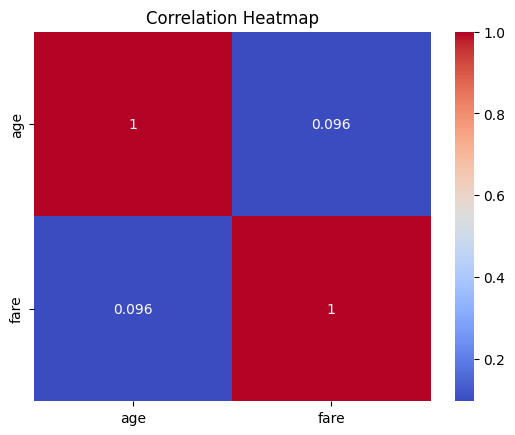

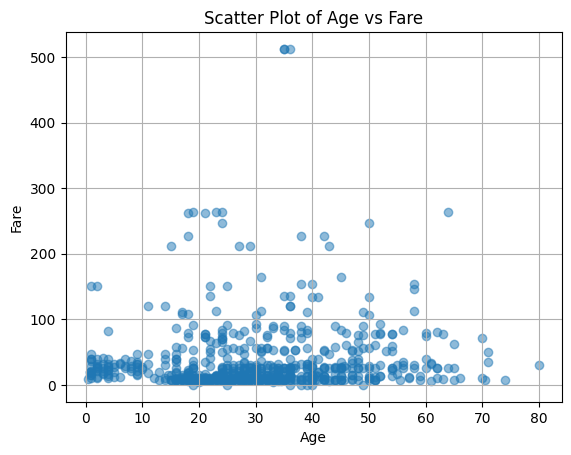

In [ ]:
df_clean = df[['age', 'fare']].dropna()
correlation = df_clean['age'].corr(df_clean['fare'])
print(f"Pearson Correlation (age vs fare): {correlation:.4f}")
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
plt.scatter(df_clean['age'], df_clean['fare'], alpha=0.5)
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

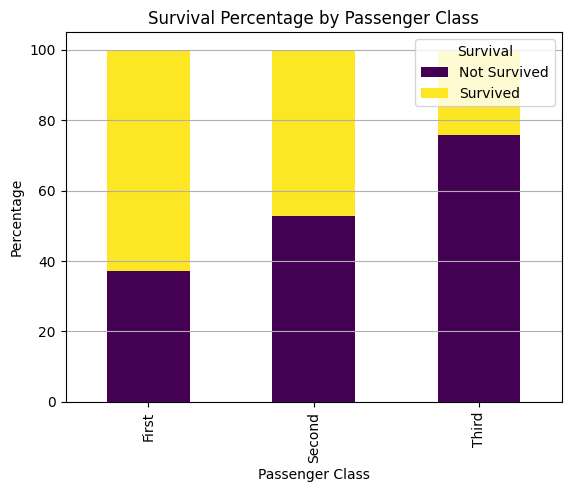

In [ ]:
survival_by_class = pd.crosstab(df['class'], df['survived'], normalize='index') * 100
survival_by_class.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Survival Percentage by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Percentage')
plt.legend(['Not Survived', 'Survived'], title='Survival')
plt.grid(True, axis='y')
plt.show()